In [55]:
import pandas as pd
import numpy as np
import os
from helpers import overview_generator, overview_generator_mc, return_bottom, return_top

perf_dir = "performance_ann"
dense_bottom = pd.read_excel(os.path.join(perf_dir, 'dense_bottom_1.xlsx'), index_col = 0)
kimia_bottom = pd.read_excel(os.path.join(perf_dir, 'kimia_bottom_1.xlsx'), index_col = 0)
dense_top = pd.read_excel(os.path.join(perf_dir, 'dense_top_1.xlsx'), index_col = 0)
kimia_top = pd.read_excel(os.path.join(perf_dir,'kimia_top_1.xlsx'), index_col = 0)



print(dense_bottom.loc["accuracy"]["precision"], 
      kimia_bottom.loc["accuracy"]["precision"],
      dense_top.loc["accuracy"]["precision"],
      kimia_top.loc["accuracy"]["precision"])

0.53 0.75 0.7 0.86


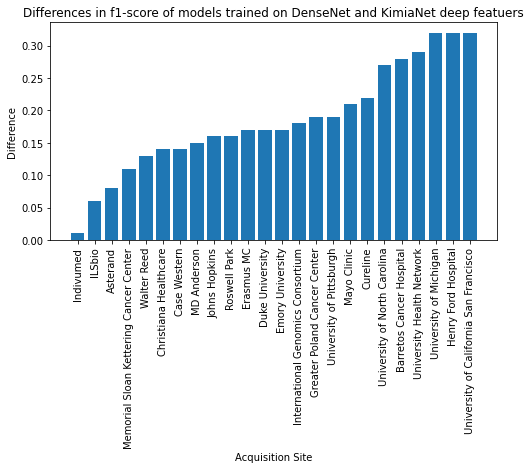

In [51]:
diff_top = pd.DataFrame([kimia_top["f1-score"], dense_top["f1-score"],
                         (kimia_top - dense_top)["f1-score"]]).transpose()
diff_top.columns = ["f1-score KimiaNet", "f1-score DenseNet", "difference"]
diff_top = diff_top.drop(["accuracy", "weighted avg", "macro avg"])

x = diff_top.sort_values("difference")

plt.figure(figsize=(8,4))
plt.bar(x = x.index, height= x["difference"])
plt.xticks(rotation = 90)
plt.ylabel("Difference")
plt.xlabel("Acquisition Site")
plt.title("Differences in f1-score of models trained on DenseNet and KimiaNet deep featuers")
plt.show()

# Performance of models trained for acquisition site detection whithin each TCGA project

In [56]:
dense_projper = pd.read_excel(os.path.join(perf_dir, "dense_projper.xlsx"), index_col=0)
test_size = dense_projper.test_size
dense_projper.index = dense_projper.project_id
dense_projper = dense_projper.iloc[:,1:-1]

kimia_projper = pd.read_excel(os.path.join(perf_dir, "kimia_projper.xlsx"), index_col=0)
kimia_projper.index = kimia_projper.project_id
kimia_projper = kimia_projper.iloc[:,1:-1]

diff_project = kimia_projper.mean(axis=1) - dense_projper.mean(axis=1)
diff_project.describe()

count    30.000000
mean      0.135089
std       0.061692
min       0.010293
25%       0.113038
50%       0.133199
75%       0.179468
max       0.251637
dtype: float64

Apparantly KimiaNet's deep features contain more info on acquisition sites, whithin every single TCGA projects, compared to their DenseNet couterparts.

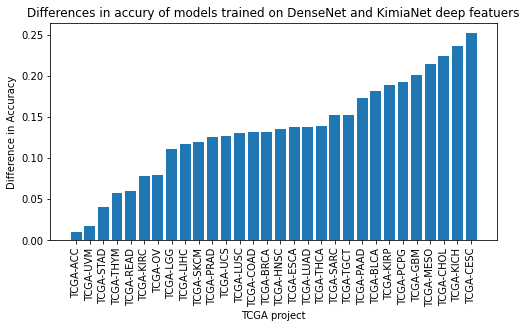

In [64]:
x = pd.DataFrame(diff_project, columns= ["difference"]).sort_values("difference")

plt.figure(figsize=(8,4))
plt.bar(x = x.index, height= x["difference"])
plt.xticks(rotation = 90)
plt.ylabel("Difference in Accuracy")
plt.xlabel("TCGA project")
plt.title("Differences in accury of models trained on DenseNet and KimiaNet deep featuers")
plt.show()

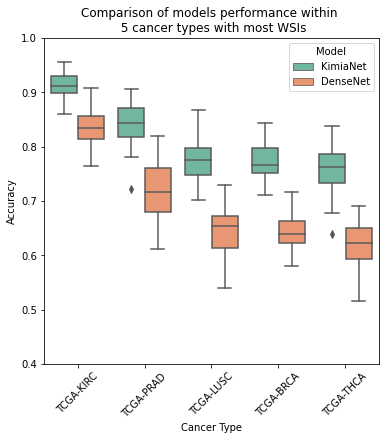

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,6))

kim_melt =  pd.melt(kimia_projper.transpose())
kim_melt.columns = ["Project_id", "Accuracy"]
kim_melt["Model"] = "KimiaNet"

dense_melt = pd.melt(dense_projper.transpose())
dense_melt.columns = ["Project_id", "Accuracy"]
dense_melt["Model"] = "DenseNet"

all_melt = pd.concat([kim_melt, dense_melt]).reset_index(drop = True)
all_melt = all_melt[all_melt.Project_id.isin(["TCGA-KIRC", "TCGA-PRAD", "TCGA-LUSC", "TCGA-BRCA", "TCGA-THCA"])].reset_index(drop = True)

sns.boxplot(data = all_melt, x = "Project_id", y = "Accuracy",
            hue = "Model", order = ["TCGA-KIRC", "TCGA-PRAD", "TCGA-LUSC", "TCGA-BRCA", "TCGA-THCA"],
            palette="Set2")

plt.ylim(0.4,1)
plt.xlabel("Cancer Type")
plt.ylabel("Accuracy")
plt.title("Comparison of models performance within \n 5 cancer types with most WSIs")
plt.xticks(rotation = 45)

#fig.savefig("Figure_2.pdf", dpi = 900, bbox_inches = 'tight')